# Import the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import classification_report,confusion_matrix
plt.style. use('fivethirtyeight')
pd.set_option('display.max_rows',None)

# Reading the csv and printing its shape

In [2]:
#Reading the csv and printing its shape

df = pd.read_csv(r"C:\Users\krish\Downloads\emp_promotion.csv")
print('Shape of train data {}'.format(df.shape))
df.head(3)

Shape of train data (54808, 14)


employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   

   length_of_service  KPIs_met >80%  awards_won?  avg_training_score  \
0                  8              1            0                  49   
1                  4              0            0                  60   
2                  7              0            0                  50   

   is_promoted  
0            0  
1            0  
2            0

# Data is imbalanced

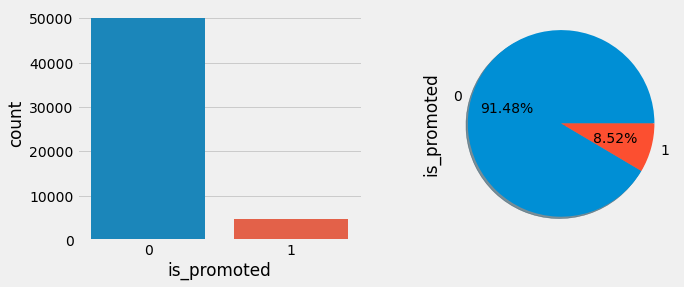

In [3]:
#Data is imbalanced
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(df['is_promoted'])
plt.subplot(122)
df['is_promoted'].value_counts().plot(kind='pie',autopct ='%.2f%%',shadow=True)
plt. show( )

# From the below bar plot, we came to know that employee with training score > 95 & previous year rating > 3 got promoted."

<AxesSubplot:xlabel='avg_training_score', ylabel='previous_year_rating'>

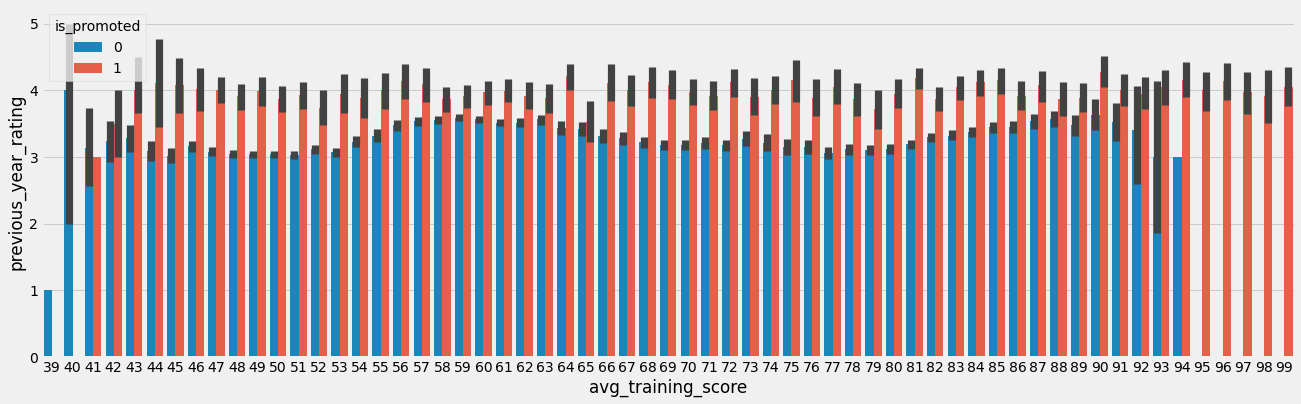

In [4]:
#From the below bar plot, we came to know that employee with training score > 95 & previous year rating > 3 got promoted."
plt.figure(figsize=(20,6))
sns.barplot(df['avg_training_score'],df['previous_year_rating'],df['is_promoted'])

# Descriptive Analysis

In [5]:
df.describe(include='all')

employee_id         department    region   education gender  \
count   54808.000000              54808     54808       52399  54808   
unique           NaN                  9        34           3      2   
top              NaN  Sales & Marketing  region_2  Bachelor's      m   
freq             NaN              16840     12343       36669  38496   
mean    39195.830627                NaN       NaN         NaN    NaN   
std     22586.581449                NaN       NaN         NaN    NaN   
min         1.000000                NaN       NaN         NaN    NaN   
25%     19669.750000                NaN       NaN         NaN    NaN   
50%     39225.500000                NaN       NaN         NaN    NaN   
75%     58730.500000                NaN       NaN         NaN    NaN   
max     78298.000000                NaN       NaN         NaN    NaN   

       recruitment_channel  no_of_trainings           age  \
count                54808     54808.000000  54808.000000   
unique                   3              NaN           NaN   
top                  other              NaN           NaN   
freq                 30446              NaN           NaN   
mean                   NaN         1.253011     34.803915   
std                    NaN         0.609264      7.660169   
min                    NaN         1.000000     20.000000   
25%                    NaN         1.000000     29.000000   
50%                    NaN         1.000000     33.000000   
75%                    NaN         1.000000     39.000000   
max                    NaN        10.000000     60.000000   

        previous_year_rating  length_of_service  KPIs_met >80%   awards_won?  \
count           50684.000000       54808.000000   54808.000000  54808.000000   
unique                   NaN                NaN            NaN           NaN   
top                      NaN                NaN            NaN           NaN   
freq                     NaN                NaN            NaN           NaN   
mean                3.329256           5.865512       0.351974      0.023172   
std                 1.259993           4.265094       0.477590      0.150450   
min                 1.000000           1.000000       0.000000      0.000000   
25%                 3.000000           3.000000       0.000000      0.000000   
50%                 3.000000           5.000000       0.000000      0.000000   
75%                 4.000000           7.000000       1.000000      0.000000   
max                 5.000000          37.000000       1.000000      1.000000   

        avg_training_score   is_promoted  
count         54808.000000  54808.000000  
unique                 NaN           NaN  
top                    NaN           NaN  
freq                   NaN           NaN  
mean             63.386750      0.085170  
std              13.371559      0.279137  
min              39.000000      0.000000  
25%              51.000000      0.000000  
50%              60.000000      0.000000  
75%              76.000000      0.000000  
max              99.000000      1.000000

# Drop unwanted features

In [6]:
df = df.drop(['employee_id','gender','region','recruitment_channel'],axis=1)

# Check for null values

In [7]:
df.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
print(df["education"].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [9]:
mv=df[df["education"].isnull()].index.tolist()
df.drop(mv, axis=0, inplace=True)

In [10]:
df.isnull().sum()

department                 0
education                  0
no_of_trainings            0
age                        0
previous_year_rating    3739
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
print(df["previous_year_rating"].value_counts())

3.0    17867
5.0    11362
4.0     9509
1.0     5887
2.0     4035
Name: previous_year_rating, dtype: int64


In [12]:
df["previous_year_rating"]=df["previous_year_rating"].fillna(df["previous_year_rating"].mode()[0])

In [13]:
negative=df[(df['KPIs_met >80%']==0) & (df['awards_won?']==0) & (df['previous_year_rating']==1.0) & (df['is_promoted']==1) & (df['avg_training_score']<60)]

In [14]:
negative

department   education  no_of_trainings  age  \
31860  Sales & Marketing  Bachelor's                1   27   
51374  Sales & Marketing  Bachelor's                1   31   

       previous_year_rating  length_of_service  KPIs_met >80%  awards_won?  \
31860                   1.0                  2              0            0   
51374                   1.0                  5              0            0   

       avg_training_score  is_promoted  
31860                  58            1  
51374                  58            1

In [15]:
q1=np.quantile(df["length_of_service"],0.25)
q3=np.quantile(df["length_of_service"],0.75)

IQR= q3-q1

ub=(1.5*IQR)+q3
lb=(1.5*IQR)-q1

In [16]:
print("q1" ,q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper bound :',ub)
print('Lower bound :',lb)
print ('skewed df : ',len(df[df[ 'length_of_service' ]>ub]))

q1 3.0
q3 : 8.0
IQR : 5.0
Upper bound : 15.5
Lower bound : 4.5
skewed df :  2298


In [17]:
print ('skewed df : ',len(df[df[ 'length_of_service' ]>ub]))

skewed df :  2298


In [18]:
pd.crosstab([df['length_of_service']>ub],df['is_promoted'])

is_promoted            0     1
length_of_service             
False              45716  4385
True                2137   161

In [19]:
df['length_of_service']=[ub if x>ub else x for x in df['length_of_service']]

In [20]:
df[ 'education' ].isnull()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       False
67       False
68       False
69       False
70       F

In [21]:
df['education']=df['education'].replace(("Below Secondary", "Bachelor's","Master's & above"),(1,2,3))

In [22]:
df[ 'education' ]

0        3
1        2
2        2
3        2
4        2
5        2
6        2
7        3
8        2
9        3
11       2
12       2
13       3
14       3
15       2
16       2
17       2
18       2
19       2
20       2
22       2
23       2
24       3
25       2
26       2
27       2
28       2
29       2
30       2
31       2
33       2
34       2
35       2
36       2
37       2
38       3
39       2
40       2
41       2
42       2
44       2
45       2
46       3
47       2
48       2
49       3
50       2
51       2
52       2
53       2
54       2
55       2
56       2
57       3
58       2
59       2
60       3
61       2
62       2
63       3
64       2
65       3
66       2
67       2
68       2
69       2
70       2
71       3
72       3
73       2
74       2
75       3
76       2
77       2
78       2
79       2
80       2
81       3
83       2
84       2
85       3
86       2
88       3
89       2
91       2
92       3
93       3
94       2
95       2
96       2
97       2

In [23]:
lb = LabelEncoder()
df['department']=lb.fit_transform(df['department'])

In [24]:
x=df.drop('is_promoted',axis=1)
y = df['is_promoted']
print(x.shape)
print(y.shape)

(52399, 9)
(52399,)


In [25]:
!pip install imblearn

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
sm=SMOTE()
x_resample,y_resample=sm.fit_resample(x,y)

Text(0.5, 1.0, 'After oversampling')

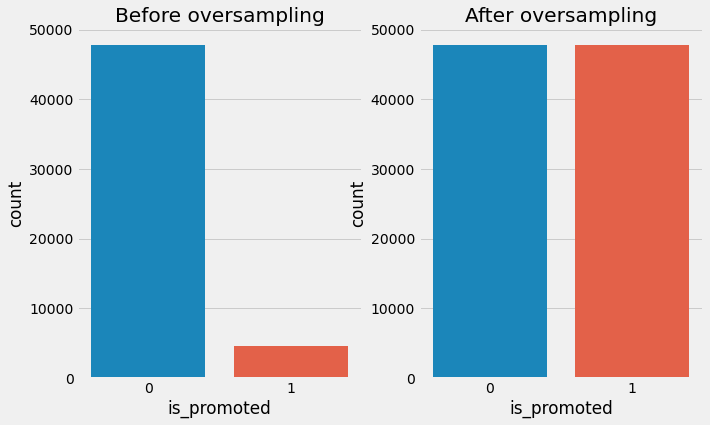

In [28]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(y)
plt.title('Before oversampling')
plt.subplot(122)
sns.countplot(y_resample)
plt.title('After oversampling')

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3,random_state=10)

In [30]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))

Shape of x_train (66994, 9)
Shape of y_train (66994,)
Shape of x_test (28712, 9)
Shape of y_test (28712,)


In [31]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [32]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [33]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [34]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [35]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)

In [36]:
compareModel(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[13141  1177]
 [  928 13466]]
Classification report
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     14318
           1       0.92      0.94      0.93     14394

    accuracy                           0.93     28712
   macro avg       0.93      0.93      0.93     28712
weighted avg       0.93      0.93      0.93     28712

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[13442   876]
 [  781 13613]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     14318
           1       0.94      0.95      0.94     14394

    accuracy                           0.94     28712
   macro avg       0.94      0.94      0.94     28712
weighted avg       0.94      0.94      0.94     28712

-----------------------------------------------

In [37]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

In [38]:
cv=cross_val_score(rf,x_resample,y_resample,cv=5)

In [39]:
cv
np.mean(cv)

0.9451137727860681

In [40]:
pickle.dump(rf,open('model.pkl','wb'))